In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the data
data = pd.read_csv('../data/Fertilizer_Rec_new.csv')

In [6]:
# Display first few rows
print(data.head())

    Ph     EC     P      K Crop_Type  Urea     TSP    MOP  Compost  \
0  5.8  0.031  42.1   34.4    Tomato  19.5   29.67  21.67  1083.33   
1  5.6  0.043  39.5   44.2    Tomato  19.5   29.67  21.67  1083.33   
2  5.5  0.033   6.3   78.5    Tomato  19.5  127.17  21.67  1083.33   
3  5.4  0.087  58.7  436.8    Tomato  26.0   32.50   0.00     0.00   
4  6.5  0.014   3.6   88.3    Tomato  19.5  127.17  21.67  1083.33   

   Unnamed: 9  Unnamed: 10  
0         NaN          NaN  
1         NaN          NaN  
2         NaN          NaN  
3         NaN          NaN  
4         NaN          NaN  


In [7]:
# Drop irrelevant columns
data = data.drop(columns=['Unnamed: 9', 'Unnamed: 10'])

In [8]:
# Display first few rows
print(data.head())

    Ph     EC     P      K Crop_Type  Urea     TSP    MOP  Compost
0  5.8  0.031  42.1   34.4    Tomato  19.5   29.67  21.67  1083.33
1  5.6  0.043  39.5   44.2    Tomato  19.5   29.67  21.67  1083.33
2  5.5  0.033   6.3   78.5    Tomato  19.5  127.17  21.67  1083.33
3  5.4  0.087  58.7  436.8    Tomato  26.0   32.50   0.00     0.00
4  6.5  0.014   3.6   88.3    Tomato  19.5  127.17  21.67  1083.33


In [9]:
# Get a summary of the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ph         232 non-null    float64
 1   EC         232 non-null    float64
 2   P          232 non-null    float64
 3   K          232 non-null    float64
 4   Crop_Type  232 non-null    object 
 5   Urea       232 non-null    float64
 6   TSP        232 non-null    float64
 7   MOP        232 non-null    float64
 8   Compost    232 non-null    float64
dtypes: float64(8), object(1)
memory usage: 16.4+ KB
None


In [10]:
# Check for missing values
print(data.isnull().sum())

Ph           0
EC           0
P            0
K            0
Crop_Type    0
Urea         0
TSP          0
MOP          0
Compost      0
dtype: int64


In [11]:
# Summary statistics for numerical columns
print(data.describe())

               Ph          EC           P            K        Urea  \
count  232.000000  232.000000  232.000000   232.000000  232.000000   
mean     5.794828    0.121865   42.075388   213.958534   25.599138   
std      0.583989    0.407239   63.733404   248.796387    6.166949   
min      4.300000    0.000500    0.100000     9.700000   19.500000   
25%      5.400000    0.029000    4.650000    81.950000   19.500000   
50%      5.800000    0.054000   12.700000   143.950000   26.000000   
75%      6.100000    0.097000   51.175000   253.700000   30.000000   
max      7.800000    4.700000  376.800000  2256.800000   40.000000   

              TSP         MOP      Compost  
count  232.000000  232.000000   232.000000  
mean    75.224224   13.862155  1213.361983  
std     45.234223    7.764105   512.271604  
min     17.150000    0.000000     0.000000  
25%     29.670000    6.330000  1083.330000  
50%     81.650000   19.330000  1083.330000  
75%    127.170000   21.670000  1666.670000  
max    13

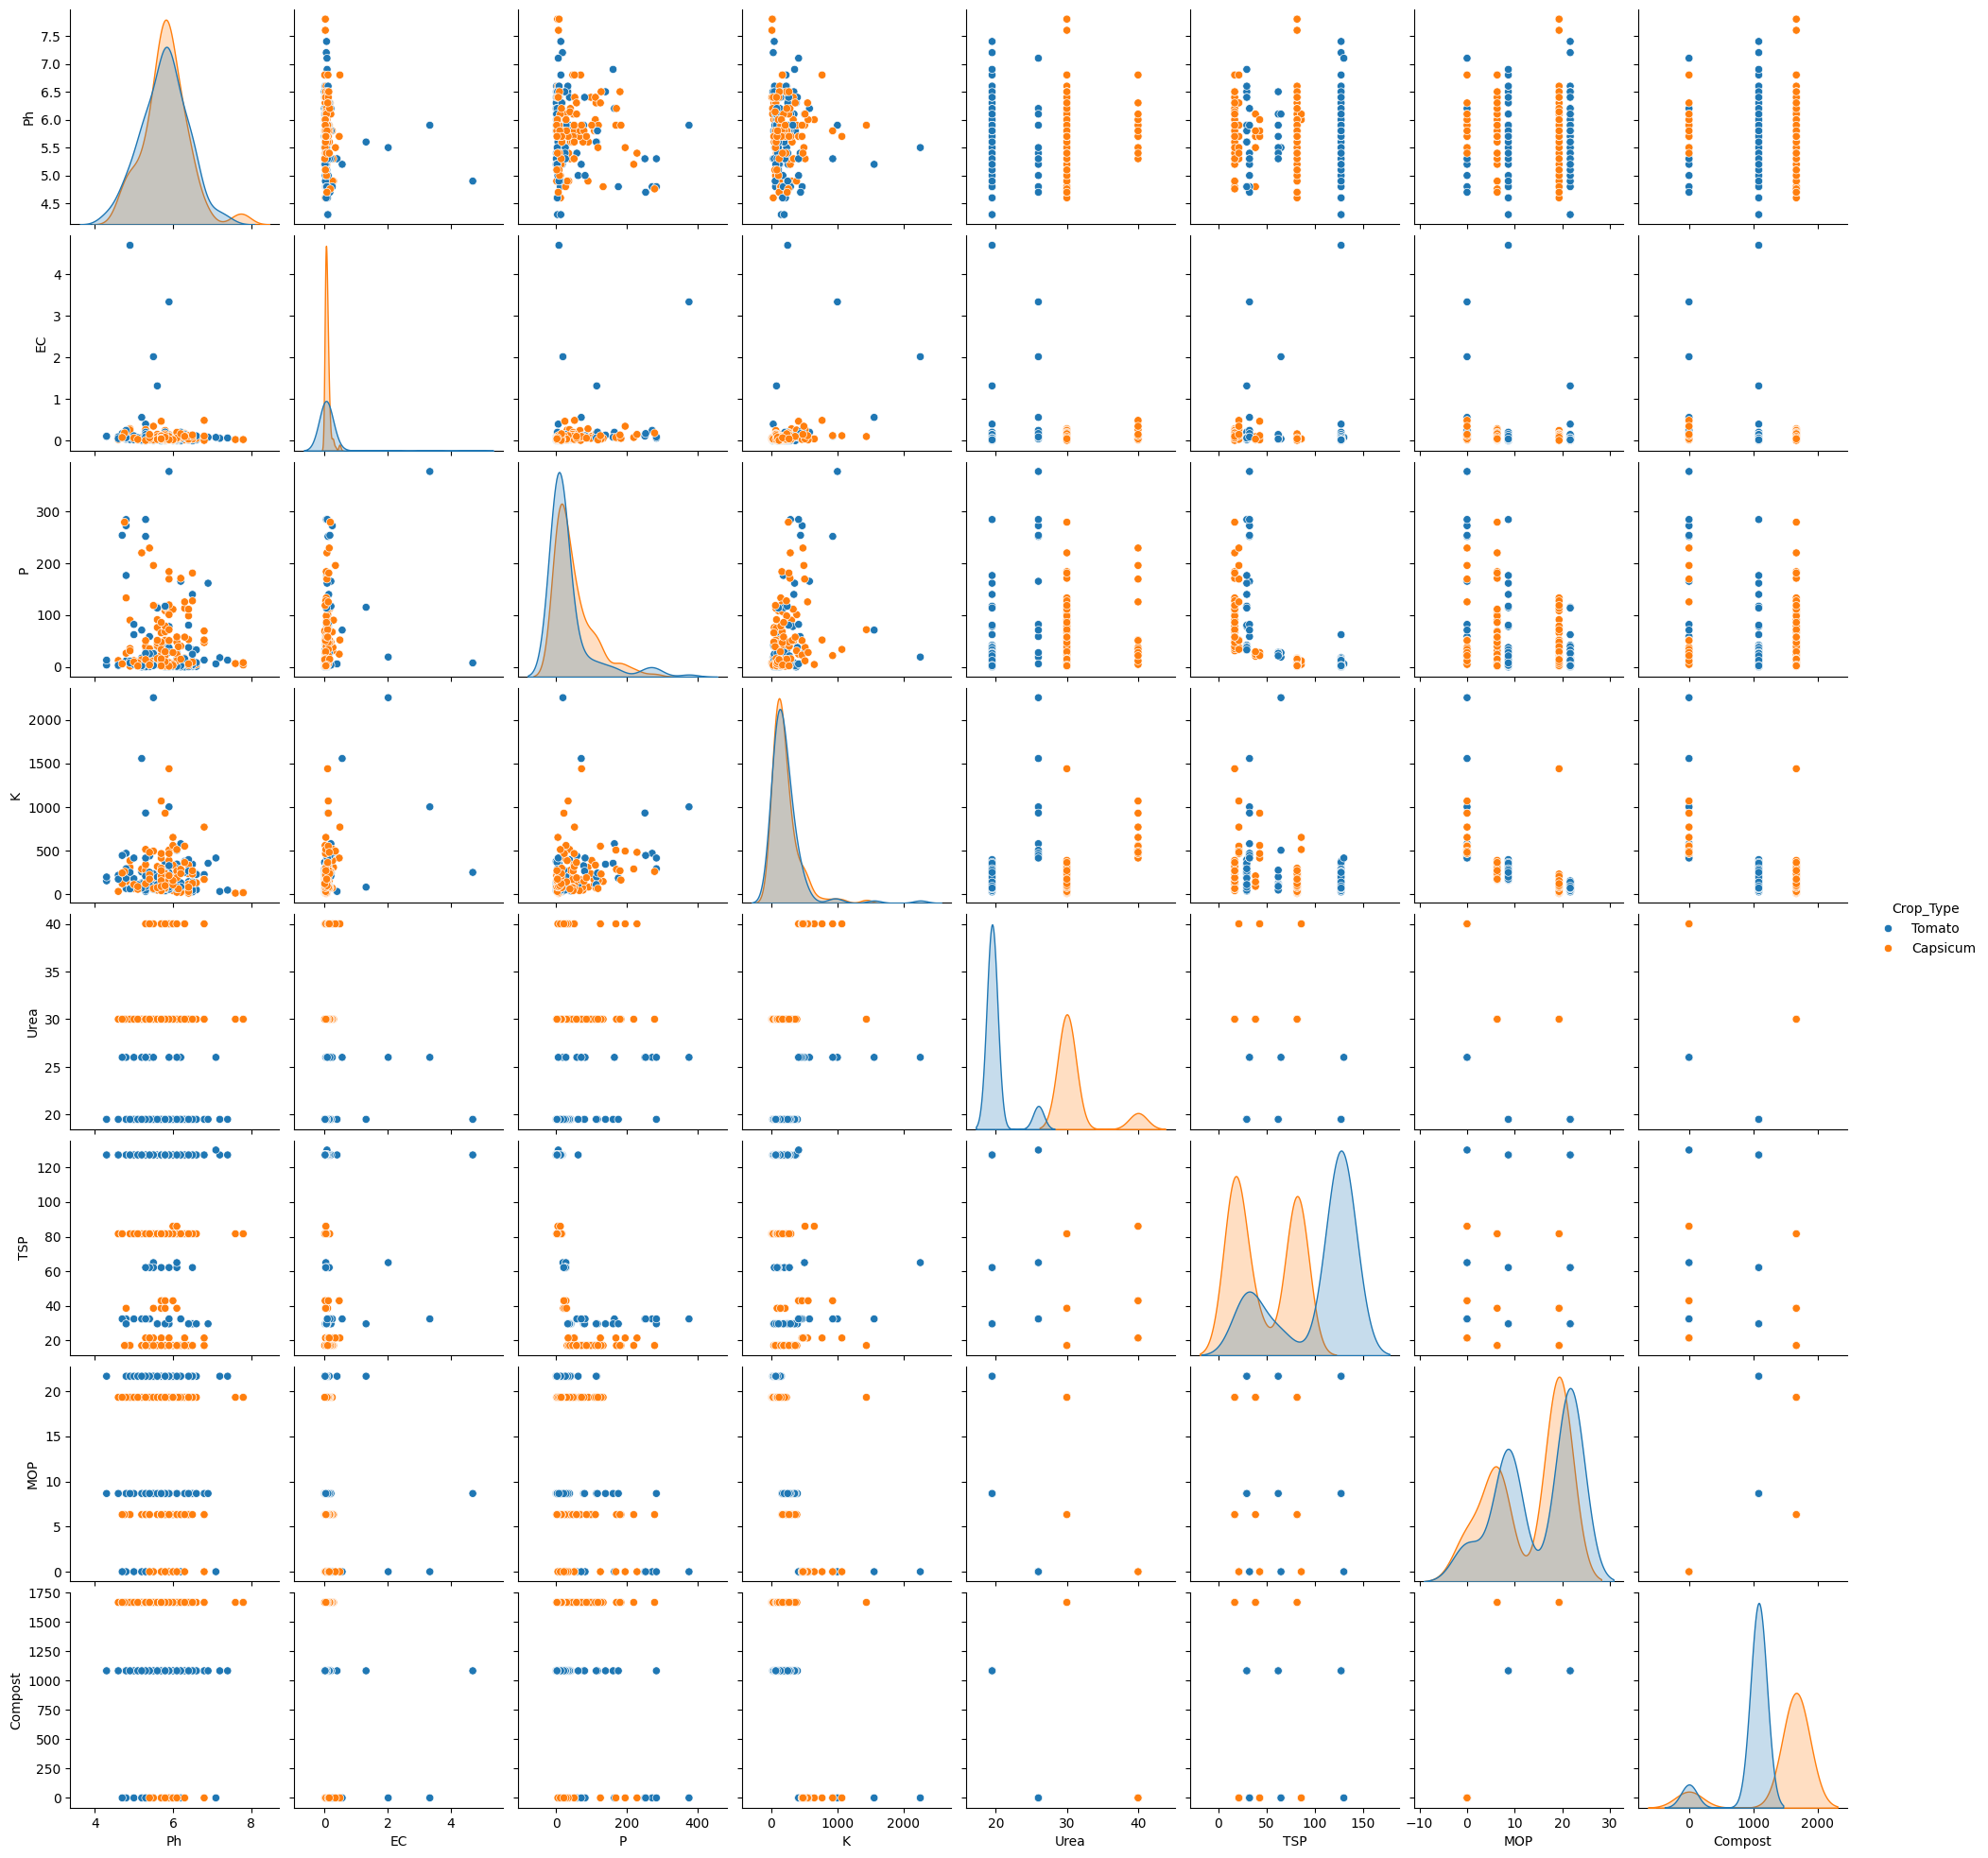

In [12]:
# Visualize relationships
sns.pairplot(data, hue='Crop_Type')
plt.show()

In [13]:
# Correlation matrix for numerical features
correlation_matrix = data[['Ph', 'EC', 'P', 'K', 'Urea', 'TSP', 'MOP', 'Compost']].corr()

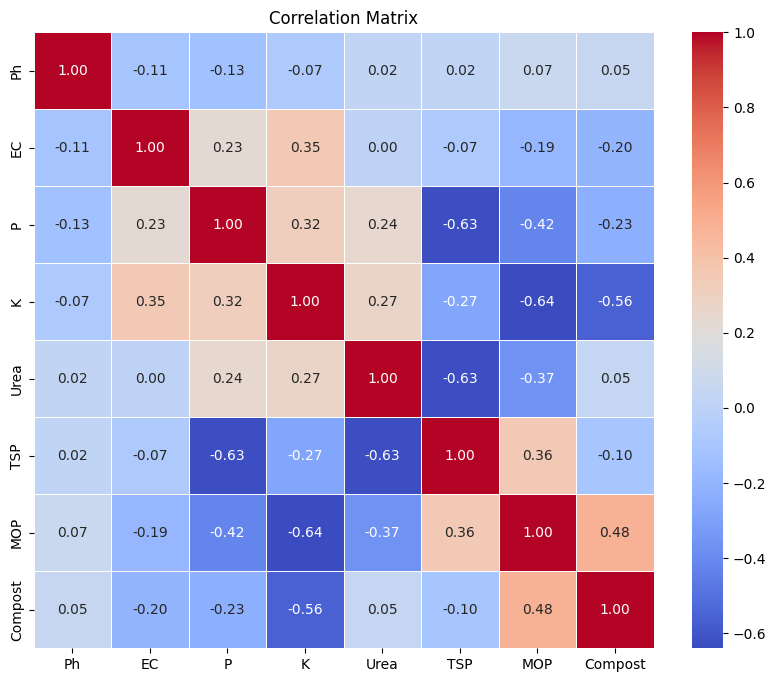

In [14]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

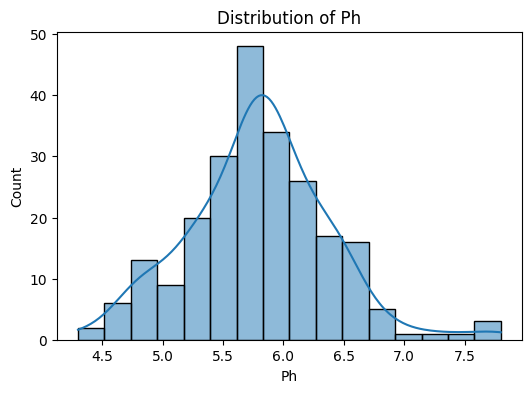

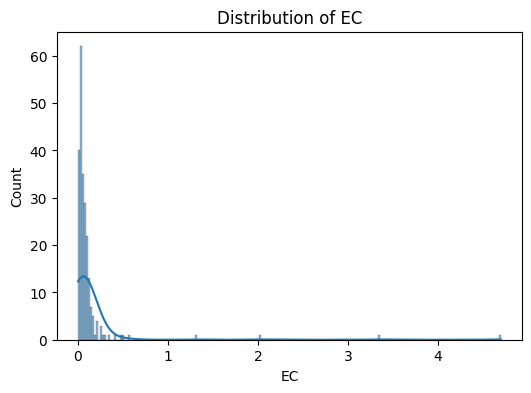

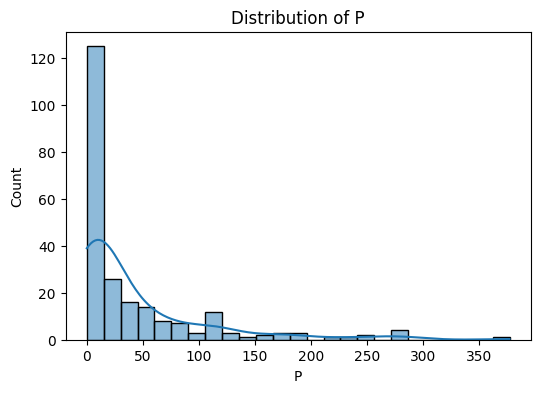

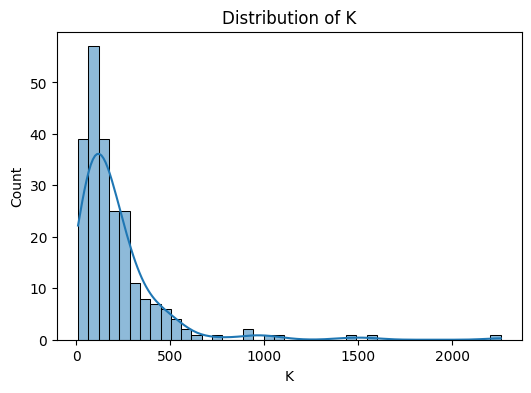

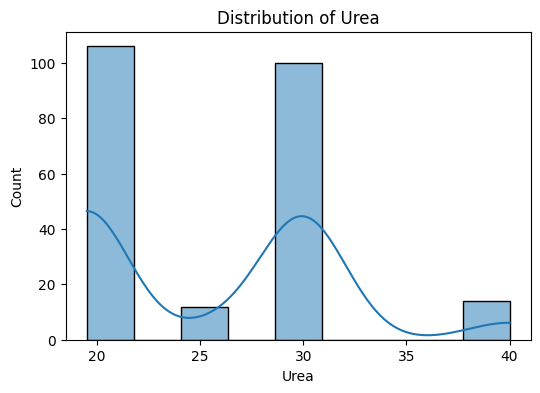

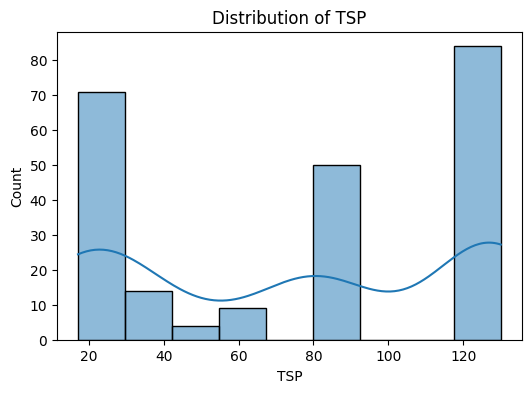

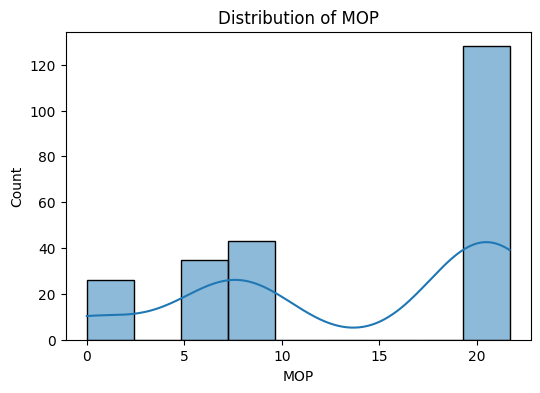

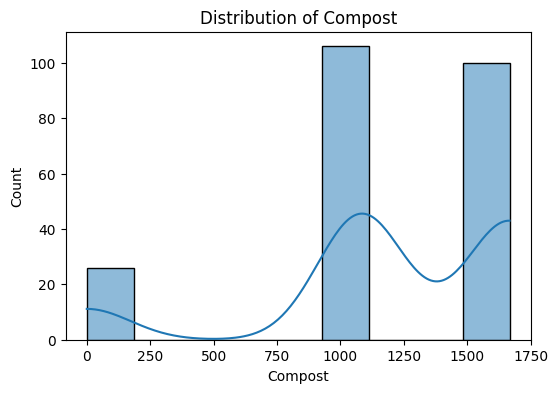

In [15]:
# Visualize the distribution of each feature
features = ['Ph', 'EC', 'P', 'K', 'Urea', 'TSP', 'MOP', 'Compost']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

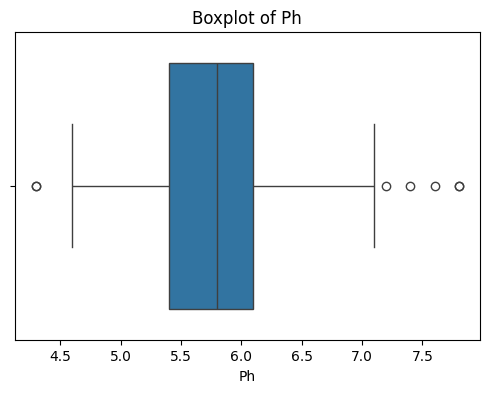

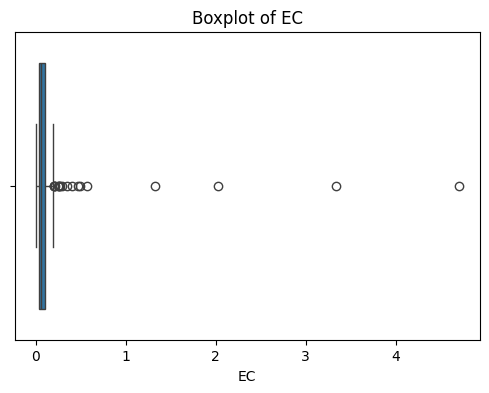

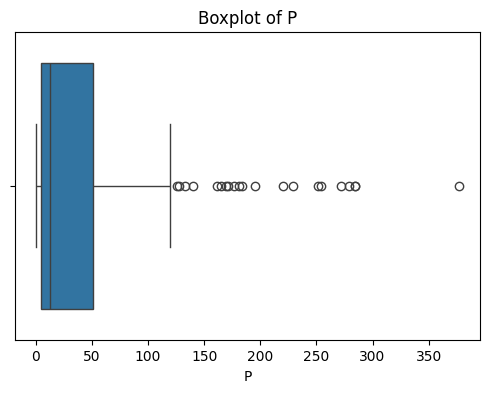

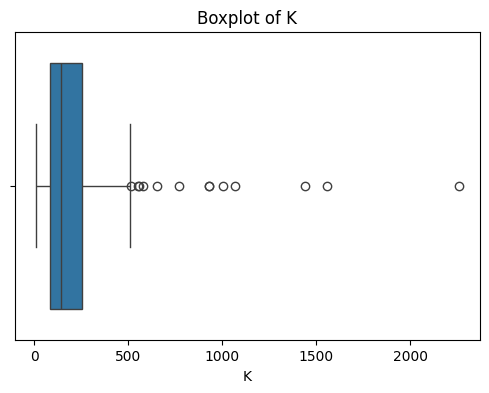

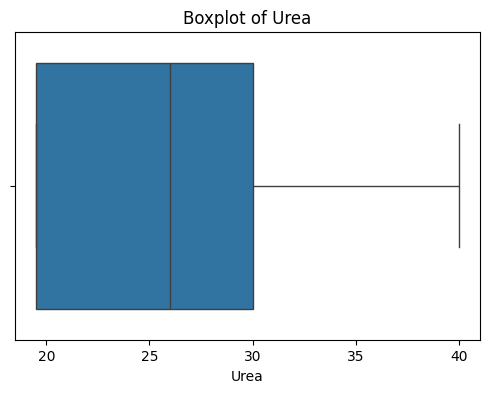

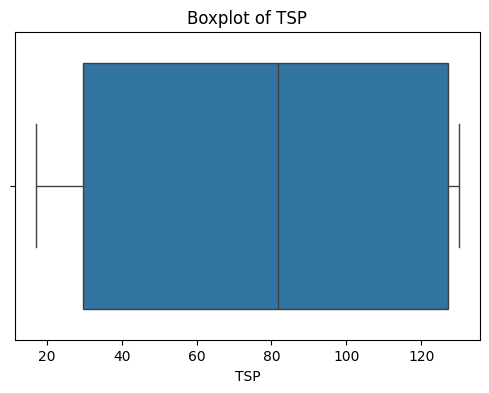

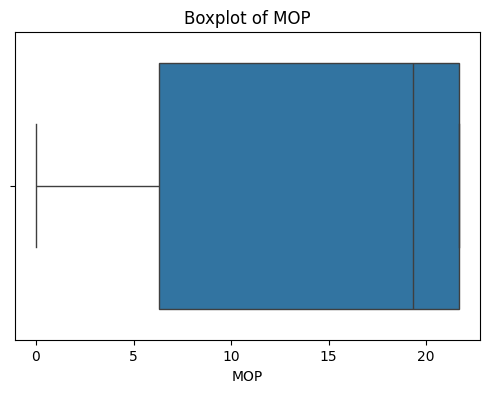

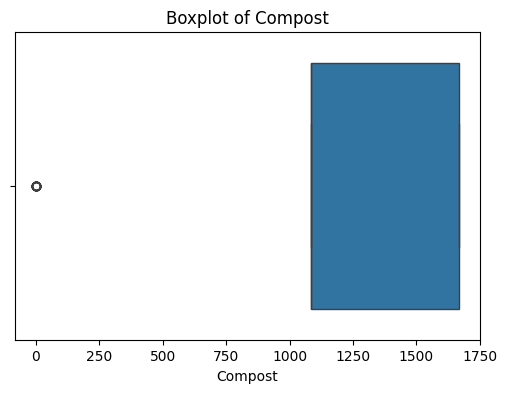

In [16]:
# Boxplot to detect outliers
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

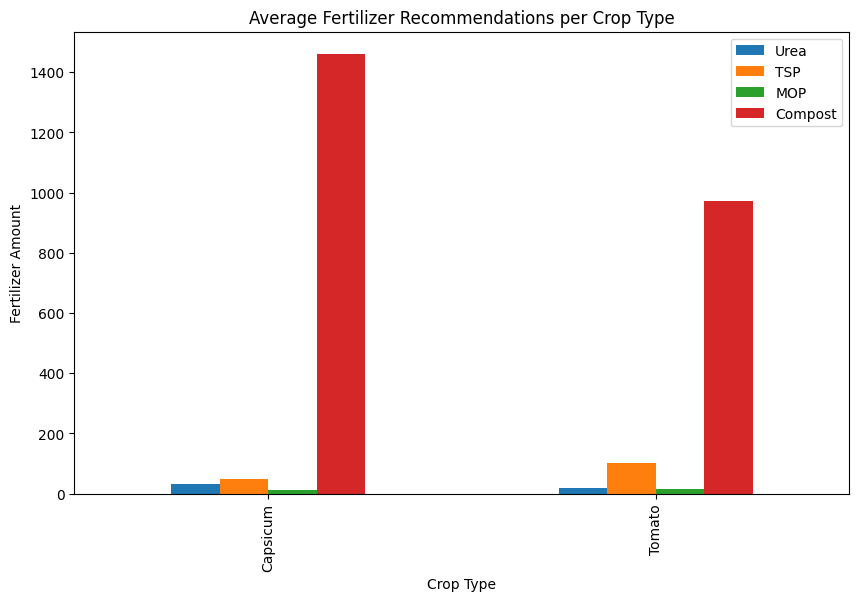

In [17]:
# Group the data by 'Crop_Type' and calculate mean for each fertilizer
grouped_data = data.groupby('Crop_Type')[['Urea', 'TSP', 'MOP', 'Compost']].mean()

# Visualize the average fertilizer recommendations for each crop type
grouped_data.plot(kind='bar', figsize=(10, 6))
plt.title('Average Fertilizer Recommendations per Crop Type')
plt.ylabel('Fertilizer Amount')
plt.xlabel('Crop Type')
plt.show()

In [18]:
from scipy import stats

# Calculate Z-scores for numerical features
z_scores = stats.zscore(data[['Ph', 'EC', 'P', 'K', 'Urea', 'TSP', 'MOP', 'Compost']])

# Set a threshold for Z-scores (commonly 3)
threshold = 3

# Identify outliers (Z-score greater than 3 or less than -3)
outliers = (abs(z_scores) > threshold).any(axis=1)

# Display rows with outliers
outlier_rows = data[outliers]
print(outlier_rows)

       Ph     EC      P       K Crop_Type  Urea     TSP    MOP  Compost
26   5.50  2.022   19.2  2256.8    Tomato  26.0   65.00   0.00     0.00
59   7.60  0.030    6.7     9.7  Capsicum  30.0   81.65  19.33  1666.67
60   7.80  0.030    4.0    19.5  Capsicum  30.0   81.65  19.33  1666.67
61   7.80  0.030    8.4    14.6  Capsicum  30.0   81.65  19.33  1666.67
119  5.90  3.340  376.8  1001.7    Tomato  26.0   32.50   0.00     0.00
142  5.30  0.114  251.7   930.8    Tomato  26.0   32.50   0.00     0.00
143  4.80  0.251  272.3   467.8    Tomato  26.0   32.50   0.00     0.00
144  4.80  0.064  284.2   290.6    Tomato  19.5   29.67   8.67  1083.33
145  4.70  0.174  253.8   443.2    Tomato  26.0   32.50   0.00     0.00
157  5.20  0.563   71.2  1557.5    Tomato  26.0   32.50   0.00     0.00
163  4.90  4.700    7.9   248.4    Tomato  19.5  127.17   8.67  1083.33
169  5.30  0.093  284.3   413.4    Tomato  26.0   32.50   0.00     0.00
185  4.76  0.188  279.1   258.5  Capsicum  30.0   17.15   6.33  

In [20]:
tomato_data = data[data['Crop_Type'] == 'Tomato']
print(tomato_data.describe())

capsicum_data = data[data['Crop_Type'] == 'Capsicum']
print(capsicum_data.describe())


               Ph          EC           P            K        Urea  \
count  118.000000  118.000000  118.000000   118.000000  118.000000   
mean     5.772881    0.156127   35.131271   215.371017   20.161017   
std      0.593650    0.564510   69.576431   276.135183    1.972981   
min      4.300000    0.000500    0.100000    24.600000   19.500000   
25%      5.325000    0.022000    3.025000    83.700000   19.500000   
50%      5.800000    0.038500    6.750000   137.050000   19.500000   
75%      6.100000    0.086750   25.850000   249.000000   19.500000   
max      7.400000    4.700000  376.800000  2256.800000   26.000000   

              TSP         MOP      Compost  
count  118.000000  118.000000   118.000000  
mean   101.843390   14.728983   973.160847  
std     40.760434    7.853953   328.829212  
min     29.670000    0.000000     0.000000  
25%     62.170000    8.670000  1083.330000  
50%    127.170000   21.670000  1083.330000  
75%    127.170000   21.670000  1083.330000  
max    13

In [22]:
Q1 = data[['Ph', 'EC', 'P', 'K']].quantile(0.25)
Q3 = data[['Ph', 'EC', 'P', 'K']].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = data[(data[['Ph', 'EC', 'P', 'K']] < lower_bound) | (data[['Ph', 'EC', 'P', 'K']] > upper_bound)].dropna()
print("Outliers based on IQR:")
print(outliers)


Outliers based on IQR:
Empty DataFrame
Columns: [Ph, EC, P, K, Crop_Type, Urea, TSP, MOP, Compost]
Index: []


In [23]:
data[['Ph', 'EC', 'P', 'K']] = data[['Ph', 'EC', 'P', 'K']].clip(lower=lower_bound, upper=upper_bound, axis=1)
print("Data after capping outliers:")
print(data.describe())


Data after capping outliers:
               Ph          EC           P           K        Urea         TSP  \
count  232.000000  232.000000  232.000000  232.000000  232.000000  232.000000   
mean     5.786422    0.069205   34.137511  187.424591   25.599138   75.224224   
std      0.557522    0.055047   40.819961  139.181211    6.166949   45.234223   
min      4.350000    0.000500    0.100000    9.700000   19.500000   17.150000   
25%      5.400000    0.029000    4.650000   81.950000   19.500000   29.670000   
50%      5.800000    0.054000   12.700000  143.950000   26.000000   81.650000   
75%      6.100000    0.097000   51.175000  253.700000   30.000000  127.170000   
max      7.150000    0.199000  120.962500  511.325000   40.000000  130.000000   

              MOP      Compost  
count  232.000000   232.000000  
mean    13.862155  1213.361983  
std      7.764105   512.271604  
min      0.000000     0.000000  
25%      6.330000  1083.330000  
50%     19.330000  1083.330000  
75%     21

In [24]:
# Save the cleaned dataset
cleaned_file_path = '../data/Cleaned_Fertilizer_Rec.csv'
data.to_csv(cleaned_file_path, index=False)

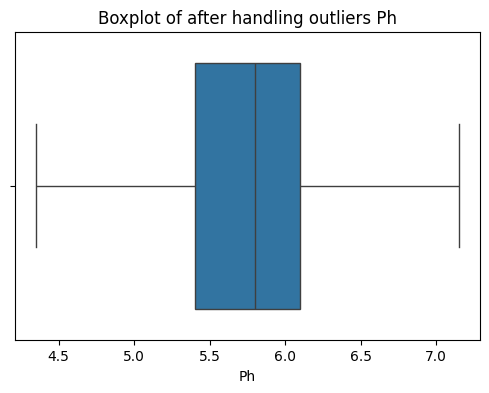

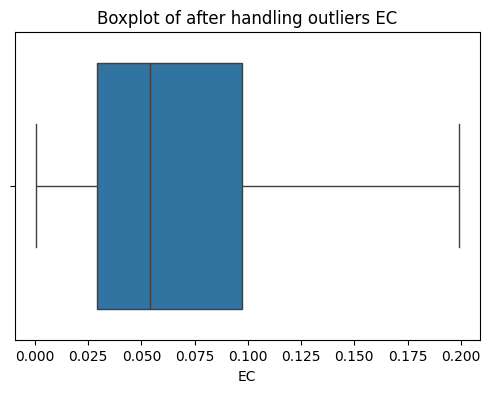

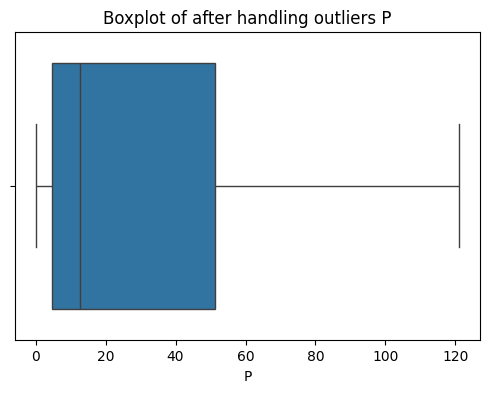

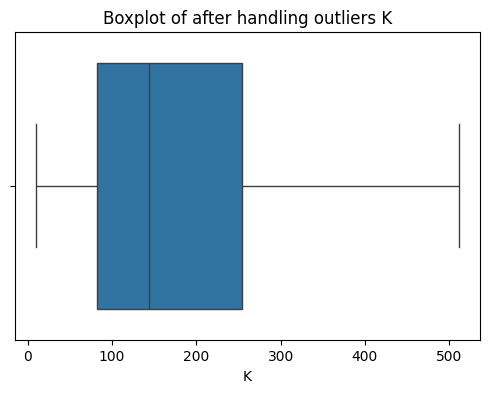

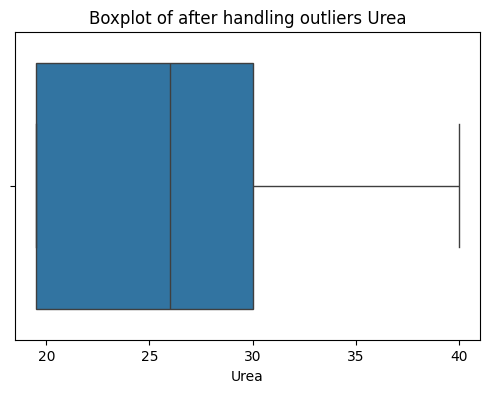

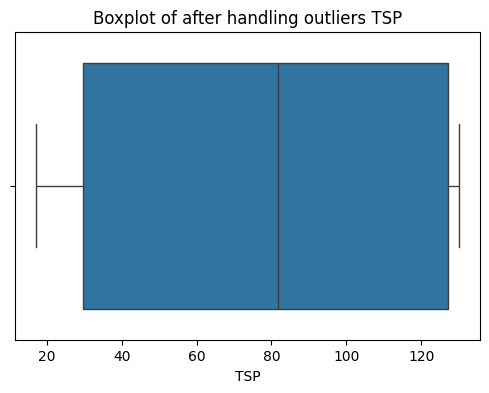

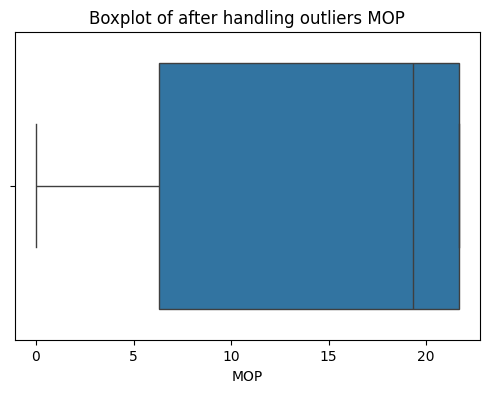

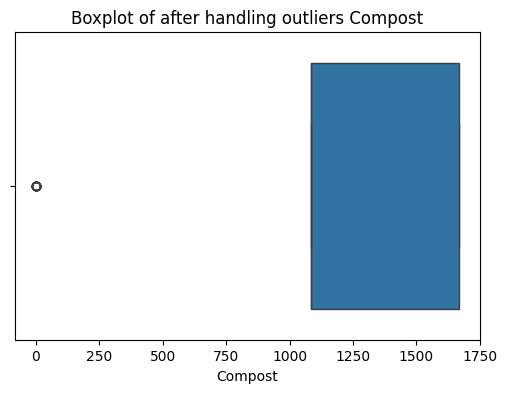

In [26]:
# Boxplot to detect outliers
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of after handling outliers {feature}')
    plt.show()